# coordinate transfer
In this notebook, we would like to establish the correspondance between charging station coordiante and (pytorch3d) render coordinate. 

From differentiable render, the recovered pose is expressed in pytorch3d coordinates, which might not be that straight forward to see in common charging station coordinates

In [ ]:
# P_cam = [R|t] np.array([0, 1, 0], P_station 
#                        [0, 0, 1],
#                        [1, 0, 0])

[[-1.0000000e+00 -0.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 1.2246468e-16 -0.0000000e+00 -1.0000000e+00]] [[2.4492936e-13]
 [0.0000000e+00]
 [2.0000000e+03]]


/home/shzhou2/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:544: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
/home/shzhou2/project/pose_est/eval/coordinate_transfer/utils.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


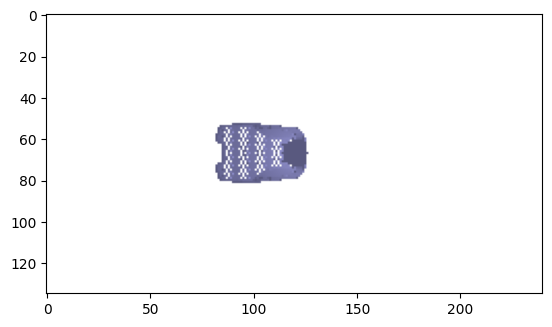

In [38]:
import numpy as np
from scipy.spatial.transform import Rotation
def render2station_extrinsic(R, t):
    if len(t.shape) == 1:
        t = t.reshape(-1, 1)
    old_extr = np.eye(4)
    old_extr[:3] = np.stack((R, t))
    T = np.eye(4)
    T[:3, :3] = np.array([[0, 1, 0],
                          [0, 0, 1],
                          [1, 0, 0]])
    new_extr = old_extr @ T
    new_R = new_extr[:3, :3]
    new_t = new_extr[:3, 3:]
    return new_R, new_t

def station2render_extrinsic(R, t):
    if len(t.shape) == 1:
        t = t.reshape(-1, 1)
    old_extr = np.eye(4)
    old_extr[:3] = np.hstack((R, t))
    T = np.eye(4)
    T[:3, :3] = np.array([[0, 1, 0],
                          [0, 0, 1],
                          [1, 0, 0]]).T
    new_extr = old_extr @ T
    new_R = new_extr[:3, :3]
    new_t = new_extr[:3, 3:]
    return new_R, new_t

def pose_from_Rt(R, t):
    if len(t.shape) == 1:
        t = t.reshape(-1, 1)
    pose = np.eye(4)
    pose[:3, :3] = R
    pose[:3, 3:] = t
    return pose

roll, pitch, yaw = 0, 0, np.pi
cam_pose_R = Rotation.from_euler('ZXY', [roll, pitch, yaw]).as_matrix()
cam_pose_t = np.array([0, 0, 2000])
cam_pose = pose_from_Rt(cam_pose_R, cam_pose_t)
cam_extr_render = np.linalg.inv(cam_pose)  
# print(cam_extr_station)
# cam_extr_render = station2render_extrinsic(cam_extr_station[:3, :3], cam_extr_station[:3, 3:])
# print(cam_extr_render)
image_size = [1080 // 8, 1920 // 8]
R, t = cam_extr_render[:3, :3], cam_extr_render[:3, 3:]
print(R, t)
R, t = torch.from_numpy(R), torch.from_numpy(t.flatten())
img = render('../station_new.obj', R, t, image_size=image_size)
plt.imshow(img)

[[ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -0.00000000e+00  2.22044605e-16]] [[-2.22044605e-13]
 [ 0.00000000e+00]
 [ 1.00000000e+03]]


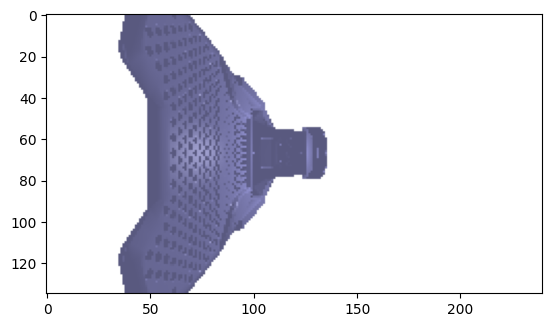

In [41]:
roll, pitch, yaw = 0, 0, -np.pi / 2
cam_pose_R = Rotation.from_euler('ZXY', [roll, pitch, yaw]).as_matrix()
cam_pose_t = np.array([2000, 0, 0000])
cam_pose = pose_from_Rt(cam_pose_R, cam_pose_t)
cam_extr_render = np.linalg.inv(cam_pose)  
# print(cam_extr_station)
# cam_extr_render = station2render_extrinsic(cam_extr_station[:3, :3], cam_extr_station[:3, 3:])
# print(cam_extr_render)
image_size = [1080 // 8, 1920 // 8]
R, t = cam_extr_render[:3, :3], cam_extr_render[:3, 3:]
print(R, t)
R, t = torch.from_numpy(R), torch.from_numpy(t.flatten())
img = render('../station_new.obj', R, t, image_size=image_size)
plt.imshow(img)

In [25]:
cam_extr_render

(array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]]),
 array([[2000.],
        [   0.],
        [   0.]]))

[[1.e+00 0.e+00 0.e+00 2.e+03]
 [0.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+00]]
(array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]]), array([[2000.],
       [   0.],
       [   0.]]))


/home/shzhou2/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:544: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
/home/shzhou2/project/pose_est/eval/coordinate_transfer/utils.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


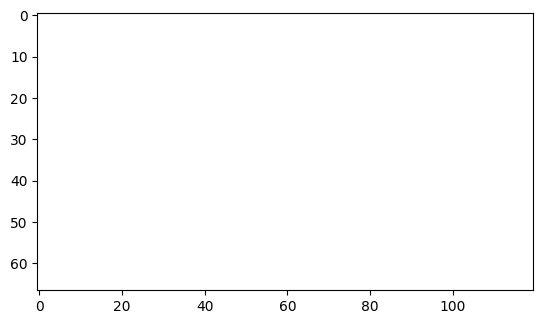

In [27]:
from eval_render import render
import matplotlib.pyplot as plt
import torch
image_size = [1080 // 16, 1920 // 16]

# verifiy this is correct, by rending image
roll, pitch, yaw = 0, 0, 0
cam_pose_R = Rotation.from_euler('XYZ', [roll, pitch, yaw]).as_matrix()
cam_pose_t = np.array([-2000, 0, 0])
cam_pose = pose_from_Rt(cam_pose_R, cam_pose_t)
cam_extr_station = np.linalg.inv(cam_pose)  
print(cam_extr_station)
cam_extr_render = station2render_extrinsic(cam_extr_station[:3, :3], cam_extr_station[:3, 3:])
print(cam_extr_render)


R, t = cam_extr_render
R, t = torch.from_numpy(R), torch.from_numpy(t.flatten())
img = render('../station_new.obj', R, t, image_size=image_size)
plt.imshow(img)

conclusion: 
1. camera pose is actually defined in render's coordinates, don't try to directly relate it to station coordinate.
2. the transformation is relatively simple, just swap cooridnates

[render -> station]
```
    [0 1 0]
R   [0 0 1]  + t
    [1 0 0]
```

In [62]:
import torch 
import os.path as osp
import pytorch3d
for name in ['1m.png', '1.5m.png']:
    dir_name = '../out_resize_{}_lr_0.5/'.format(name)
    R = torch.load(osp.join(dir_name, 'R.pth')).cpu()
    R = pytorch3d.transforms.rotation_6d_to_matrix(R).numpy()
    T = np.array([[0, 1, 0],
                [0, 0, 1],
                [1, 0, 0]])
    R = T @ R
    t = torch.load(osp.join(dir_name, 't.pth')).cpu().numpy()

    print('==={}==='.format(name))
    print('R', R)
    print('t', t)
    print('distance(mm)', np.linalg.norm(t))

===1m.png===
R [[[ 0.99944204 -0.0299566   0.01476902]
  [ 0.03193501  0.98661709 -0.15989588]
  [-0.00978143  0.16027832  0.98702335]]]
t [[ -35.917778   81.10105  1072.0669  ]]
distance(mm) 1075.73
===1.5m.png===
R [[[ 0.9999584   0.0063853   0.00652195]
  [-0.00562561  0.99385965 -0.11050611]
  [-0.00718753  0.11046481  0.99385411]]]
t [[ -40.531845  126.012054 1427.8643  ]]
distance(mm) 1433.9868


In [57]:
dir_name = '../out_resize_1.5m.png_lr_0.5/'
R = torch.load(osp.join(dir_name, 'R.pth')).cpu()
R = pytorch3d.transforms.rotation_6d_to_matrix(R).numpy()
T = np.array([[0, 1, 0],
            [0, 0, 1],
            [1, 0, 0]])
R = T @ R
t = torch.load(osp.join(dir_name, 't.pth')).cpu().numpy()

print('R', R)
print('t', t)
print(np.linalg.norm(t))

R [[[ 0.9999584   0.0063853   0.00652195]
  [-0.00562561  0.99385965 -0.11050611]
  [-0.00718753  0.11046481  0.99385411]]]
t [[ -40.531845  126.012054 1427.8643  ]]
1433.9868
